# Redes Neuronales

## Representaciones de datos para redes neuronales

En el último ejemplo, comenzamos trabajando con datos almacenados en arrays multidimensionales de NumPy, también llamados *tensores*. En general, todos los sistemas de ML actuales utilizan tensores como su estructura de datos básica.

De forma básica, un tensor es un contenedor de datos, usualmente datos numéricos. Por lo que es un contenedor para números. Ya conocemos las matrices, que son tensores de rango 2: los tensores son generalizaciones de matrices a un número arbitrario de *dimensiones* (en este contexto, una dimensión a menudo se conoce como *eje* (*axis*).

### Escalares (Tensores de rango 0)

Un tensor que sólo contiene un número se llama *escalar* (*tensor escalar*, *tensor de rango 0*, etc). Usando NumPy, un número del tipo `float32`o `float64` es un tensor escalar. 

Podemos ver el número de *axis* de un tensor de NumPy usando el atributo `ndim`; un tensor escalar tiene 0 ejes. El número de ejes de un tensor también se conoce como su *rango*. Veamos:

In [1]:
import numpy as np

x = np.array(42)

x

array(42)

In [2]:
x.ndim

0

### Vectores (Tensores de rango 1)

Un array de números se conoce como un *vector* o *tensor de rango 1*.

In [3]:
y = np.array([42, 15, 6, 14, 7])

y

array([42, 15,  6, 14,  7])

In [4]:
y.ndim

1

Notemos que el vector tiene 5 entradas, por lo que es un *vector de 5 dimensiones*. Pero ¡no nos confundamos! No es un tensor de rango 5. Este vector sólo tiene un eje y tiene cinco dimensiones sobre ese único eje.

### Matrices (Tensores de rango 2)

Un array de vectores es una *matriz*, o *tensor de rango 2*. Una matriz tiene dos ejes (filas y columnas). Podemos interpretarlo gráficamente como un arreglo rectangular de números.

In [5]:
z = np.array([[1,2,3,4,5],
            [1, 4, 9, 16, 25],
            [1, 8, 27, 64, 125]])

z

array([[  1,   2,   3,   4,   5],
       [  1,   4,   9,  16,  25],
       [  1,   8,  27,  64, 125]])

In [6]:
z.ndim

2

### Tensores de rango 3 y superiores

Si juntamos matrices para formar un nuevo array, obtenemos un *tensor de rango 3*, que podemos interpretar visualmente como un cubo de números. 

In [7]:
w = np.array([[[5, 78, 2, 34, 0],
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]],
            [[5, 78, 2, 34, 0],
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]],
            [[5, 78, 2, 34, 0],
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]]])

w

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [8]:
w.ndim

3

Veamos gráficamente los tres ejemplos vistos anteriormente

<img src="arrays.png">

Entonces, para resumir, decimos que un tensor se define por tres atributos principales:

- Número de ejes (rango)

- Forma (*shape*): Es una tupla de enteros que describe cuántas dimensiones tiene el tensor en cada eje. Por ejemplo, la matriz del ejemplo tiene forma `(3,5)`, y el tensor de rango 3 tiene forma `(3,3,5)`. El vector tiene un solo elemento, por lo que tiene forma `(5,)`, mientras que el escalar no tiene ejes, por lo que tiene forma `()`.

- Tipo de datos (llamados `dtype` en Python): Corresponde al tipo de dato contenido en el tensor. 

Para dejarlo más claro, volvamos a los datos del ejemplo del MNIST. Primero, cargamos el conjunto de datos del MNIST:

In [9]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Veamos el número de ejes del tensor `train_images`:

In [10]:
train_images.ndim

3

Su forma es:

In [11]:
train_images.shape

(60000, 28, 28)

Y el tipo de dato:

In [12]:
train_images.dtype

dtype('uint8')

Entonces, tenemos un tensor de rango 3 con enteros de 8 bits. Con mayor precisión, es un array de 60,000 matrices de 28 x 28 enteros. Cada una de las matrices es una imagen en escala de grises, con coeficientes entre 0 y 255.

Por mera curiosidad, veamos cómo se ve el cuarto dígito en este tensor de rango 3, usaremos la biblioteca Matplotlib.

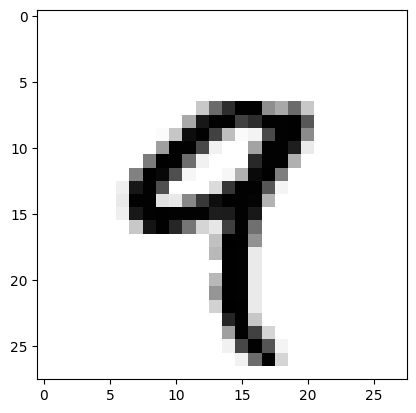

In [13]:
import matplotlib.pyplot as plt

digit = train_images[4]

plt.imshow(digit, cmap = plt.cm.binary)

plt.show()

Parece un 9, pero verifiquemos.

In [14]:
train_labels[4]

9

## Introducción a Keras y TensorFlow

TensorFlow (TF) es una plataforma basada en Python, gratuita y de código abierto, desarrollada principalmente por Google. Similar a NumPy, el propósito principal de TensorFlow es permitir al usuario manipular expresiones matemáticas en tensores numéricos.

Keras es una API (Application Programming Interface) para Python, construida sobre TensorFlow, que provee una manera conveniente para definir y entrenar cualquier tipo de modelo de DL. 

### Tensores constantes y variables

Para hacer algo en TF, necesitamos algunos tensores. Los tensores deben crearse con algún valor inicial. Por ejemplo, podríamos crear tensores que sólo contengan unos o ceros, o tensores que tengan valores de alguna distribución aleatoria.

In [15]:
import tensorflow as tf

a = tf.ones(shape = (2,1))  # Equivalente a np.ones(shape=(2,1))

print(a)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [16]:
b = tf.zeros(shape = (3,3)) # Equivalente a np.zeros(shape=(2,1))

print(b)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)


In [17]:
# Creamos un tensor con valores aleatorios a partir de una distribución
# normal con media = 0 y desviación estándar = 1

c = tf.random.normal(shape = (3,1), mean = 0.0, stddev = 1.0)

print(c)

tf.Tensor(
[[-0.6865229]
 [-0.749189 ]
 [-1.6193459]], shape=(3, 1), dtype=float32)


In [18]:
d = tf.random.uniform(shape = (3,1), minval = 0., maxval = 1.)

print(d)

tf.Tensor(
[[0.9534942 ]
 [0.6751286 ]
 [0.35639477]], shape=(3, 1), dtype=float32)


Para entrenar un modelo, necesitamos actualizar su estado, que es un conjunto de tensores. Como los tensores no son asignables, tenemos que utilizar *variables* con la clase `tf.Variable`, que nos permite modificar el estado en TF. 

Para crear una variable, necesitamos dar un valor inicial, como un tensor aleatorio.

In [19]:
v = tf.Variable(initial_value = tf.random.normal(shape = (3,1)))

print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.5798259 ],
       [ 0.25543597],
       [-0.46173796]], dtype=float32)>


El estado de la variable se puede modificar a través del método `assign`, como sigue:

In [20]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

También funciona para un subconjunto de entradas.

In [21]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

### Operaciones tensoriales

TF ofrece un conjunto de operaciones tensoriales para expresar fórmulas matemáticas. Por ejemplo, si queremos obtener el cuadrado de las entradas de un tensor, usamos

In [22]:
print(d)

tf.Tensor(
[[0.9534942 ]
 [0.6751286 ]
 [0.35639477]], shape=(3, 1), dtype=float32)


In [23]:
d_sq = tf.square(d)

d_sq

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.9091512 ],
       [0.4557986 ],
       [0.12701723]], dtype=float32)>

Para sacar la raíz cuadrada


In [24]:
d_sqrt = tf.sqrt(d)

d_sqrt

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.9764703 ],
       [0.82166207],
       [0.5969881 ]], dtype=float32)>

Sumamos dos tensores, entrada a entrada

In [25]:
suma = c + d

suma

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 0.2669713 ],
       [-0.07406044],
       [-1.2629511 ]], dtype=float32)>

### Gradient Tape

`GradientTape` es una API que nos permite utilizar las capacidades de diferenciación automática de TF. Es un esquema de Python que va a "registrar" las operaciones tensoriales que corran dentro de él, en forma de un grafo computacional (a veces llamado *tape*). Ese grafo puede usarse para recuperar el gradiente de cualquier salida con respecto a cualquier variable o conjunto de variables (las instancias de la clase `tf.Variable`). 

Una `tf.Variable` es un tipo específico de tensor que debe mantener un estado mutable, por ejemplo, los pesos de una red neuronal siempre son instancias del tipo `tf.Variable`.

In [28]:
x = tf.Variable(0.) # Variable escalar con valor inicial de 0

with tf.GradientTape() as tape: # Iniciamos el esquema de GradientTape
    y = 2 * x + 3               # Dentro del esquema, aplicamos operaciones tensoriales a la variable

dy_dx = tape.gradient(y, x) # Utilizamos la tape para recuperar el gradiente de la salida y respecto a x

print(dy_dx)

tf.Tensor(2.0, shape=(), dtype=float32)


Veamos otro ejemplo, ahora con un tensor un poco más complejo.

In [29]:
x = tf.Variable(tf.random.uniform((2,2))) # Variable de forma (2,2) con valores iniciales todos ceros

with tf.GradientTape() as tape:
    y = 2 * x + 3

grad_of_y_wrt_x = tape.gradient(y, x)

grad_of_y_wrt_x



<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

## Ejemplo: Clasificador lineal en TensorFlow

Ya vimos tensores, variables y operaciones tensoriales, y ya sabemos cómo calcular gradientes. Podemos construir cualquier modelo de ML que se base en el método del gradiente descendente. Veamos.

Supongamos que nos piden implementar un clasificador lineal usando TF. Vamos a ir paso a paso, así que vamos a generar datos sintéticos bonitos y separables para trabajar: dos clases de puntos en un plano.

Generaremos cada clase de puntos dibujando sus coordenadas a partir de una distribución aleatoria con matriz de covarianza y media específicas. Recordemos que, de forma intuitiva, la matriz de covarianza describe la forma de la nube de puntos, y que la media describe su posición en el plano. 

Para este ejemplo vamos a utilizar la misma matriz de covarianza para cada una de las nubes de puntos, pero utilizaremos dos medias distintas, por lo que las nubes van a tener la misma forma, pero posiciones distintas.

Primero definiremos el número de puntos por clase que queremos, que van a ser, 1000 en cada nube.

Después, generamos las muestras "negativas" de 1000 puntos aleatorios. La matriz de covarianza coresponde a una nubecita en forma de óvalo orientada desde abajo a la izquierda hacia arriba y a la derecha.

El otro conjunto de datos es lo mismo, pero con media distinta.

In [31]:
num_samples_per_class = 1000


negative_samples = np.random.multivariate_normal(
                                                mean = [0, 3],
                                                cov = [[1, 0.5], [0.5, 1]],
                                                size = num_samples_per_class)

positive_samples = np.random.multivariate_normal(
                                                mean = [3, 0],
                                                cov = [[1, 0.5], [0.5,1]],
                                                size = num_samples_per_class)

En la celda anterior, las variables `negative_samples` y `positive_samples` son arrays de forma (1000,2). Pongamos uno sobre otro para formar un sólo array de (2000,2).

In [32]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

Ahora, tenemos que generar también las correspondientes etiquetas objetivo, que en este caso serán un array de ceros y unos de forma (2000,1), donde `targets[i,0]` va a ser 0 si `inputs[i]` pertenece a la clase 0 (y visceversa).

In [34]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = 'float32'),
                    np.ones((num_samples_per_class, 1), dtype = 'float32')))

Grafiquemos los datos con Matplotlib.

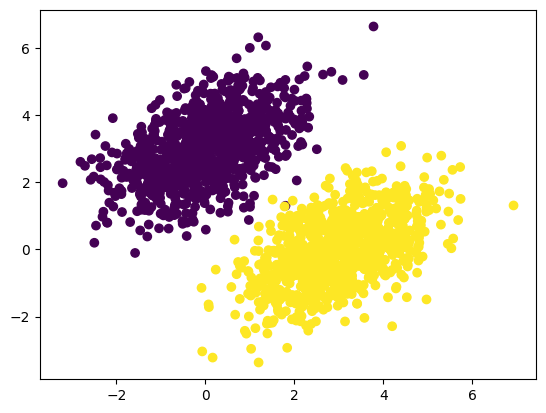

In [35]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0], inputs[:,1], c = targets[:,0])

plt.show()

Bien, tenemos los datos de entrada listos. Ahora crearemos un clasificador lineal que aprenda a separar estos dos aglomerados. Un clasificador lineal es una transformación afín (`predicción = W • entrada + b`) entrenado para minimizar el cuadrado de la diferencia entre las predicciones y los objetivos.

Creamos entonces nuestras variables `w` y `b`, inicializando con valores aleatorios y con ceros, respectivamente.

In [36]:
input_dim = 2 # Las entradas son puntos en 2 dimensiones

output_dim = 1 # Mientras que la salida será 0 o 1

w = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))

b = tf.Variable(initial_value = tf.zeros(shape = (output_dim)))


Definimos la función de paso:

In [37]:
def model(inputs):
    return tf.matmul(inputs, w) + b

Como nuestro clasificador lineal opera en entradas de 2 dimensiones, `w` en realidad está formado por dos coeficientes escalares, `w1` y `w2`: `w = [[w1], [w2]]`.

Mientras que `b` es un solo coeficiente escalar. Por lo que, para cada dato de entrada `[x,y]`, su predicción será: `prediction = [[w1]. [w2]] • [x,y] + b = w1 * x + w2 * y + b`.

Ahora, definimos la función de costo, que en este caso corresponde al error cuadrático medio.

In [38]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

`per_sample_losses` será un tensor con la misma forma que los objetivos y las predicciones y que va a contener los scores de la función de costo.

El método `tf.reduce_mean()` promedia todos los valores de la función de costo y nos da un sólo número.

Ahora sigue el paso de entrenamiento, donde se va a recibir un poco de datos de entrenamiento y se van a actualizar los pesos `w` y el valor `b` para reducir el costo sobre los datos.

In [39]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [w,b])
    w.assign_sub(grad_loss_wrt_w * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

Por simplicidad, se hará *batch training* en vez de *mini-batch training*: vamos a correr cada paso de entrenamiento (calcular el gradiente y actualizar los pesos) para todos los datos, en vez de iterar en pequeños conjuntos del conjunto completo. 

In [41]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss:.4f}')

Loss at step 0: 5.1677
Loss at step 1: 0.7307
Loss at step 2: 0.2267
Loss at step 3: 0.1524
Loss at step 4: 0.1339
Loss at step 5: 0.1235
Loss at step 6: 0.1147
Loss at step 7: 0.1068
Loss at step 8: 0.0996
Loss at step 9: 0.0931
Loss at step 10: 0.0871
Loss at step 11: 0.0816
Loss at step 12: 0.0767
Loss at step 13: 0.0721
Loss at step 14: 0.0680
Loss at step 15: 0.0642
Loss at step 16: 0.0607
Loss at step 17: 0.0576
Loss at step 18: 0.0547
Loss at step 19: 0.0521
Loss at step 20: 0.0497
Loss at step 21: 0.0475
Loss at step 22: 0.0455
Loss at step 23: 0.0437
Loss at step 24: 0.0420
Loss at step 25: 0.0405
Loss at step 26: 0.0391
Loss at step 27: 0.0378
Loss at step 28: 0.0367
Loss at step 29: 0.0356
Loss at step 30: 0.0347
Loss at step 31: 0.0338
Loss at step 32: 0.0330
Loss at step 33: 0.0323
Loss at step 34: 0.0316
Loss at step 35: 0.0310
Loss at step 36: 0.0304
Loss at step 37: 0.0299
Loss at step 38: 0.0295
Loss at step 39: 0.0291


Después de 40 iteraciones, el costo del entrenamiento parece estabilizarse alrededor de 0.0255. Grafiquemos cómo nuestro modelo lineal clasifica los datos de entrenamiento.

Como nuestros objetivos son ceros y unos, una entrada dada puede ser clasificada como "0", si su valor de predicción es menor a 0.5, y como "1" si está por arriba de 0.5


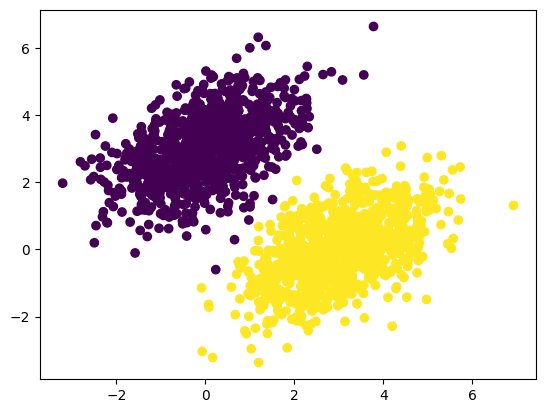

In [42]:
predictions = model(inputs)

plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:,0] > 0.5)
plt.show()

Casi no se nota la diferencia entre las predicciones del modelo (gráfica de arriba) y los datos de entrada. 

Recordemos que el valor de la predicción para cualquier punto $(x,y)$ es simplemente:

$$ \hat{y} = w_1 x + w_2 y + b  $$

Y las clases a las que se clasifica la predicción son tales que:

$$ \hat{y} = \begin{cases}
            0 & \text{si} & w_1 x + w_2 y + b < 0.5 \\
            1 & \text{si} & w_1 x + w_2 y + b > 0.5 \\

\end{cases} $$

Pero pues esto equivale a la ecuación de una recta:

$$  w_1 x + w_2 y + b = 0.5 \quad \to \quad y = - \frac{w_1}{w_2} x + \frac{0.5 - b}{w_2}$$

Arriba de la línea está la clase 1 y por debajo la clase 0. 

Grafiquemos.

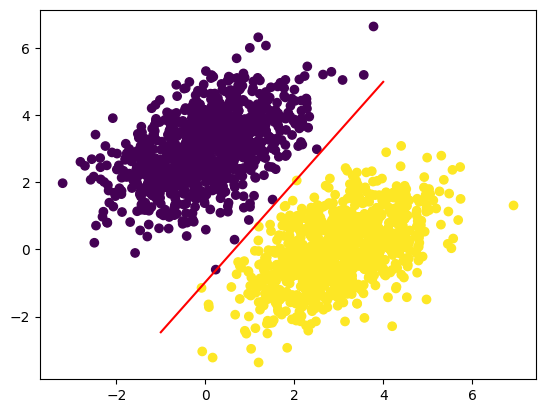

In [43]:
x = np.linspace(-1, 4, 100)

y = -w[0] / w[1] * x + (0.5 - b) / w[1]

plt.plot(x,y, "-r")
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:,0] > 0.5)
plt.show()


De esto se trata la tarea de un clasificador. Encuentra los parámetros de una línea (o, en muchas dimensiones, un hiperplano) que logre separar adecuadamente dos tipos de datos.